___

# Simple Linear Regression with Scikit Learn

___

<a id='section1'></a>
## 1. Problem Statement

The objective of this notebook is to use libraries such as numpy, pandas and scikit learn in order to create a simple linear regression model. Our dataset is small so there isn't much preprocessing and post processing work to be done. We can directly proceed to the training and testing phase.

Our data contains only 1 independent and 1 dependent variable. Our final objective is to create a model that will be used to predict the marks a student will secure based on the no. of hours of study he or she does.

___

<a id='section2'></a>
## 2. Dataset Overview

Our dataset is very small and only contains 2 columns. One which represents the number of hours the student studies and the other which represents the marks they have secured. We will use the hours feature to then predict the corresponding score.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Hours           | Number of hours the student studies                                                 | 
| Scores      | Score that the student secured                        |

__Importing Packages__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

__Importing the dataset__

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.isnull().sum()                                  #Here we can see the number of NULL values in the following columns

Hours     0
Scores    0
dtype: int64

As we can see, there are no missing values or erroneous values in our data so we can proceed to our post processing steps.

___

<a id='section3'></a>
## 3. Preparing Training and Test Sets

Now we will split our data into testing and training sets. We will first create 2 lists. The list __X__ will be used to store all our independent variables. In this case, the number of hours a student studies. The list __y__ will be used to store the values of our dependent variables in this case, score.

In [25]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

We then use scikit learn to split our data into test and training splits. We do this with the help of sklearn's built in train_test_split function. 

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

The above code splits the dataset into training and testing sets. We set a 90-10 split since we have a smaller dataset to begin with. This means that 90% of our data will be used to train the model and 10% will be used to test our model.

___

<a id='section4'></a>
## 4. Visualizing the Data

Now let us look at how these 2 features we have are correlated. We will first use the __corr()__ method to understand how our features are correlated and then we will use the Seaborn library to visualize this correlation.

In [44]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


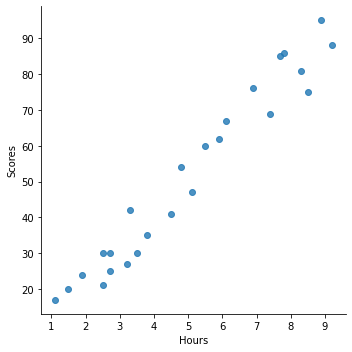

In [45]:
sns.lmplot(x='Hours', y='Scores', 
           data=data, 
           fit_reg=False)

As we can see the 2 features are highly positively correlated. This means that an increase in __Hours__ leads directly to an increase in __Score__.

___

<a id='section5'></a>
## 5. Training the Model

We can now begin to train our model using these training and testing sets. We will do this using the LinearRegression class in sklearn.

In [46]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our model training is now complete. We will now use sns.regplot in order to visualize this regression or "best fit" line.

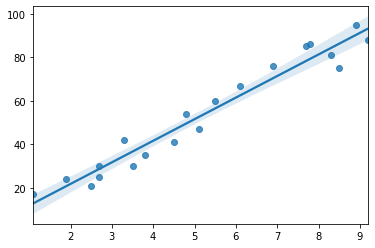

In [47]:
sns.regplot(x=X_train, y=y_train, data=data)

___

<a id='section6'></a>
## 6. Making Predictions

Now that we have our model trained, we will use our X_test data to predict the scores of the students. This will be done using the model we just trained.

In [48]:
predictions = regressor.predict(X_test)
predictions

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [59]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

We have a set of __Scores__ predictions now, one for each value of __Hours__ provided in the X_test set. These predictions will now be concatenated with the actual values and put into a single DataFrame so that they can be more easily compared.

In [51]:
compare = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


___

<a id='section7'></a>
## 7. Evaluating the Model

After we have predicted the values, we will now check how well our model has faired. This will be done by comparing these predicted values to the actual values of the test set. We will be using different metrics such as Mean Absolute Error as well as Root Mean Squared Error or RMSE.

In [55]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.183859899002975
RMSE: 4.6474476121003665


Finally, we obtain a measure of the performance of our model. As we can see, we have an error of about 4.5 units. This is not too bad considering that our dataset was quite small. If we had more data we could have possibly made more accurate predictions.

___

<a id='section8'></a>
## 8. Predictions for specific values

Now we will predict what marks a student will get given the number of hours they have studied. We will do this by first defining a value for the __Hours__ column and then passing that as an argument into our trained model.

In [61]:
hours = [[9.25]]
student_score = regressor.predict(hours)
print(student_score)

[93.69173249]


According to our model, if a student were to study 9.25 hours, it would result in them scoring about __93.7%__.

___

<a id='section9'></a>
## 9. Conclusion

- We were able to first load in the dataset with which we wanted to work with.
- Using libraries such as numpy, we looked into our data to see if it contained any erroneous or missing values.
- Once we completed this checks, we moved on to visualizing our data so as to gain deeper understanding of this data.
- We then split our data into training and testing sets and trained our model on our training set.
- The model was then fed in our X_test values and we obtained our predictions.
- Once we obtained these predictions, we moved on to evaluating our model based on the actual values of y_test. This allowed us to understand how our model faired and we were able to use metrics such as MAE and RMSE to deduce how well our model performed.
- Lastly, we predicted the score a student would get based on a specific value of hours.

___